In [201]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

read from CSV


In [102]:
headers = ["x1","x2"]
train_x = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/xtrain.cvs',names=headers)
headers = ["y"]
train_y = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/ytrain.cvs',names=headers)
train=pd.concat([train_x, train_y], axis=1)

headers = ["x1","x2"]
test_x = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/xtest.cvs',names=headers)
headers = ["y"]
test_y = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/ytest.cvs',names=headers)
test=pd.concat([test_x, test_y], axis=1)

df = pd.DataFrame(train)
train_x=df[['x1','x2']].as_matrix()
train_y=df[['y']].as_matrix()

df = pd.DataFrame(test)

test_x=df[['x1','x2']].as_matrix()
test_y=df[['y']].as_matrix()



In [104]:
def visualize(X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, 1, 1)
    ax.set_title("Input data")
    # Plot the training points
    ax.legend([1, 2], ['Class 1', 'Class 2'])

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.tight_layout()
    plt.show()

In [193]:
def get_performance(labels, predicted_labels):
    cm = confusion_matrix(labels, predicted_labels)
    tn = float(cm[1][1]) / np.sum(cm[1])

    dict = {
        "accuracy": accuracy_score(labels, predicted_labels),
        "recall": recall_score(labels, predicted_labels),
        "precision": precision_score(labels, predicted_labels),
        "FPR": 1 - tn

    }
    print(precision_score(labels, predicted_labels))
    return dict

In [194]:
def svm_fit(X,y,kernel_type):
    clf =  svm.SVC(kernel=kernel_type)
    clf.fit(X, y)  
    pred=clf.predict(X)
    
    performance=get_performance(y,pred)
    # return clf,(accuracy_score(y,pred,normalize=True)),(metrics.classification_report(y, pred))
    return clf,performance

In [195]:

trained_model,train_report=svm_fit(train_x,train_y.ravel(),'linear')

0.877637130802


In [196]:
train_report

{'FPR': 0.11417322834645671,
 'accuracy': 0.86599999999999999,
 'precision': 0.87763713080168781,
 'recall': 0.84552845528455289}

In [108]:
def svm_predict(trained_model, X, y):
    pred = trained_model.predict(X)
    performance = get_performance(y, pred)
    return pred, performance

/Users/xtarx/anaconda/envs/tensorflow_py_3/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 1 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/xtarx/anaconda/envs/tensorflow_py_3/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 2 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


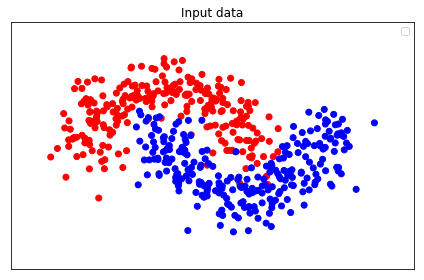

In [118]:
visualize(train_x,train_y)

Create a function svm_predict receiving the model trained above, a matrix Xt of samples
for testing and their expected outcomes yt
. The function should return a vector of predicted
outcomes and and a structure with the performance (including the accuracy, recall, FPR and
precision) on the testing samples.

In [110]:
predictions,test_report=svm_predict(trained_model,test_x,test_y)

In [111]:
print(train_report)
print( test_report)

{'recall': 0.84552845528455289, 'FPR': 0.11417322834645671, 'accuracy': 0.86599999999999999, 'precision': 0.87763713080168781}
{'recall': 0.90204081632653066, 'FPR': 0.082352941176470629, 'accuracy': 0.91000000000000003, 'precision': 0.91322314049586772}


In [176]:
h = .02  # step size in the mesh

def compare(names, classifiers, datasets,testsize=.4):
    accuracy_train = []
    accuracy_test = []

    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X_train, y_train,X_test,y_test = ds
#         X = StandardScaler().fit_transform(X)
#         X_train, X_test, y_train, y_test = \
#             train_test_split(X, y, test_size=testsize, random_state=42)
    
       
        x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
        y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
#         ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
    
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
             #get accuracy for train  
            score = clf.score(X_train, y_train)
            accuracy_train.append(score)
            
                #get accuracy for test  
            score = clf.score(X_test, y_test)
            accuracy_test.append(score)

             #get accuracy for train     performance=get_performance(y,pred)
    

    
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
#             if hasattr(clf, "decision_function"):
#                 print("has decison function")
#                 Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#             else:
#                 print("NOT has decison function")
#                 Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
            # Put the result into a color plot
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
#             ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#                        alpha=0.6)
    
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    

    plt.tight_layout()
    plt.show()
    return accuracy_train,accuracy_test    

try both the linear and then RBF kernels.
 for the RBF kernel set C to values C 2 f0:001;0:01;0:1;1;10;100;1000;10000g
 For each kernel and C parameter display a scatter plot of the training set indicating the
support vectors (c.f. Fig. 2-left)

/Users/xtarx/anaconda/envs/tensorflow_py_3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


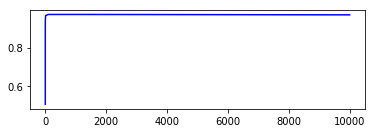

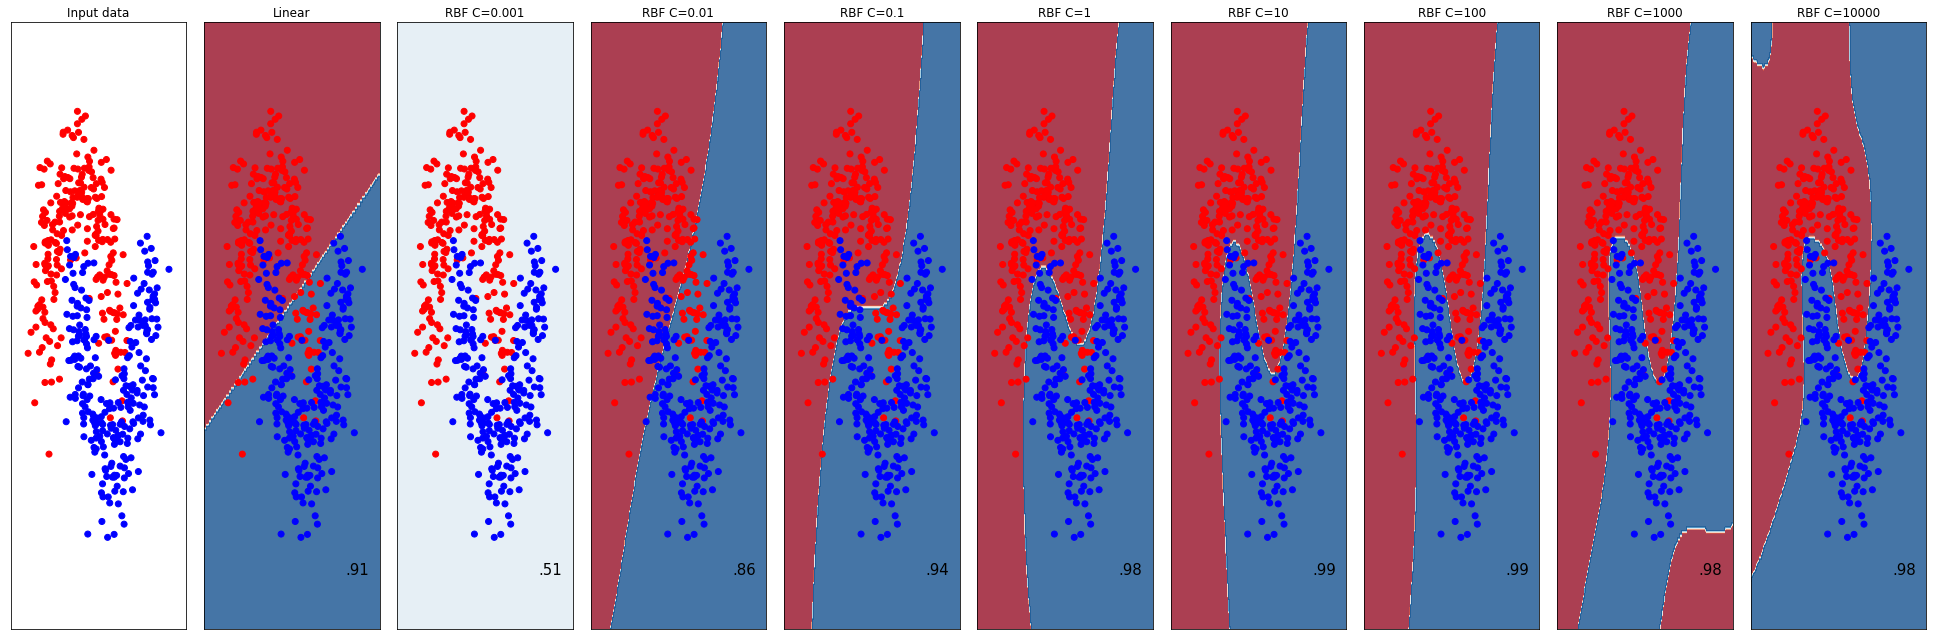

In [189]:
#defining a dictionary of classifier
kernels = {'linear', 'rbf'}
cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# cs = {0.001}
names = ["Linear"]

classifiers = [svm.SVC(kernel="linear", C=1)]

for c in cs:
    classifiers.append(svm.SVC(kernel="rbf", C=c))
    names.append("RBF C="+str(c))



# data = (train_x, train_y,test_x,test_y)
data = (train_x, train_y,test_x, test_y)


type(data)
datasets = [data]
test_x.shape

# test_x[:, 0]
accuracy_train, accuracy_test=compare(names, classifiers, datasets)

For each kernel, draw the curves for the training and testing accuracies while varying
the hyper-parameter C. Use a logarithmic horizontal scale for C.

In [190]:
accuracy_train

[0.86599999999999999,
 0.50800000000000001,
 0.80800000000000005,
 0.89200000000000002,
 0.93799999999999994,
 0.96399999999999997,
 0.96999999999999997,
 0.96999999999999997,
 0.96799999999999997]

In [191]:
len(accuracy_test)
accuracy_train=accuracy_train[1:]
accuracy_test=accuracy_test[1:]


In [192]:
len(accuracy_test)

8

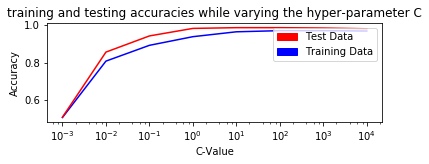

In [202]:
c_val=2
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(211)
ax2.plot(cs, accuracy_train , c='blue')
ax2.plot(cs, accuracy_test , c='red')
ax2.set_xscale('log')
ax2.set_title('training and testing accuracies while varying the hyper-parameter C')
ax2.set_xlabel('C-Value')
ax2.set_ylabel('Accuracy')
blue_patch = mpatches.Patch(color='blue', label='Training Data')
red_patch = mpatches.Patch(color='red', label='Test Data')
ax2.legend(handles=[red_patch, blue_patch], loc=1)
plt.show()


For the RBF kernel create an animation, that is a series of 2D scatter plots, one per each
value of C above. Use different colors and markers to compare the predicted vs. true values
for every combination of parameters (Fig. 2-right)

0.877637130802


/Users/xtarx/anaconda/envs/tensorflow_py_3/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 1 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/xtarx/anaconda/envs/tensorflow_py_3/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 2 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


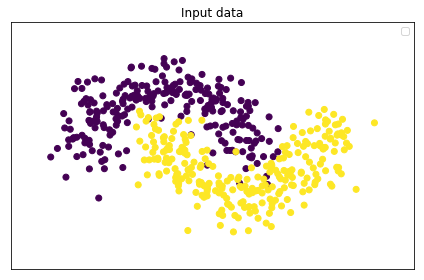

1

In [231]:
def plot_real_vs_predicted(X,y,predicted_y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, 1, 1)
    ax.set_title("Input data")
    # Plot the training points
    ax.legend([1, 2], ['Class 1', 'Class 2'])
    #facecolors='none', edgecolors='r'
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
#     ax.scatter(X[:, 0], X[:, 1], c=y)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.tight_layout()
    plt.show()
    

0.877637130802


/Users/xtarx/anaconda/envs/tensorflow_py_3/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 1 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/xtarx/anaconda/envs/tensorflow_py_3/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 2 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


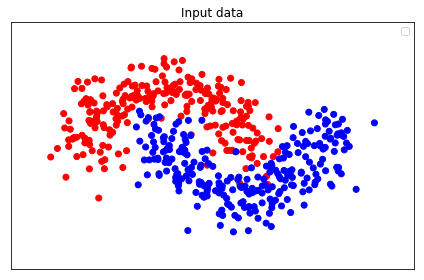

1

In [232]:
trained_model,train_report=svm_fit(train_x,train_y.ravel(),'linear')
pred_y=trained_model.predict(train_x)
train_y.ravel()
train_y.ravel().shape

train_y=train_y.ravel()

plot_real_vs_predicted(train_x,train_y,pred_y)

train_y[0]